In [ ]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data_zhihu = pd.read_csv('G:/DeapLearing/4500OLG/Data/知乎/知乎数据_201701.csv',engine='python')
data_renkou=pd.read_csv('G:/DeapLearing/4500OLG/Data/知乎/六普常住人口数.csv',engine='python')
data_zhihu.head()

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,NaN,NaN,邮政,NaN,NaN
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,NaN,重庆,互联网,重庆邮电大学,NaN
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,NaN,NaN,1.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,NaN,NaN,财务,NaN,NaN
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,NaN


In [18]:
data_renkou.head()

,省,地区,结尾,常住人口
0,安徽省,安徽省,省,59500468.0
1,安徽省,安庆市,市,5311379.0
2,安徽省,蚌埠市,市,3164467.0
3,安徽省,亳州市,市,4850657.0
4,安徽省,巢湖市,市,3873102.0


In [31]:
'''
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数
'''
def clearning_data(data):
    cols=data.columns
    print(cols)
    for i in cols:
#         print(data[i].dtype)
        data[i].fillna(0,inplace=True)
    return data
data_zhihu_clearned = clearning_data(data_zhihu)
data_zhihu_clearned.head(20)

Index(['_id', '关注的收藏夹', '关注', '关注者', '关注的问题', '关注的话题', '关注的专栏', '职业1', '职业2',
       '回答', '提问', '收藏', '个人简介', '居住地', '所在行业', '教育经历', '职业经历'],
      dtype='object')


,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,0,0,邮政,0,0
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,0,重庆,互联网,重庆邮电大学,0
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,0,0,1.0,0.0,21.0,0,0,0,0,0
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,0,0,财务,0,0
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,0
5,587598f89f11daf90617fb84,15,577,46,7472,131,81,0,0,0.0,0.0,21.0,0,0,0,0,0
6,587598f89f11daf90617fb86,13,52,3,47,2,6,0,0,0.0,0.0,0.0,大王叫我来巡山。,0,0,0,0
7,587598f89f11daf90617fb88,105,104,2,55,46,13,高新科技,电子商务,0.0,0.0,0.0,0,山东,电子商务,0,0
8,587598f89f11daf90617fb8a,795,268,39,49,1,69,高新科技,互联网,0.0,0.0,0.0,0,0,互联网,0,0
9,587598f89f11daf90617fb8c,8,111,3,31,6,3,0,0,0.0,0.0,2.0,0,0,0,0,0


In [76]:
'''
2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
'''
diqu=data_zhihu_clearned['居住地'].value_counts(sort=False)
# diqu[:100].index
# groupby 以居住地来排序 然后进行计数
diqu_city = data_zhihu_clearned.groupby('居住地').count()
# print(diqu_city)
data_renkou['city'] = data_renkou['地区'].str[:-1]

# merge
# left_index 如果为True则使用左侧的索引作为连接键 此时 diqu_city的索引是 ‘居住地’
# right_on 右侧的匹配键是 city 
# inner 是默认的 取交集 outer取并集 
diqu_nums = pd.merge(diqu_city,data_renkou,left_index = True,right_on='city')
# print(diqu_nums)

diqu_nums['密度']=diqu_nums['_id']/diqu_nums['常住人口']
# print(diqu_nums['密度'])
target_document=diqu_nums[['_id','city','常住人口','密度']]
print(target_document)

      _id city        常住人口            密度
565  3417   上海  23019196.0  1.484413e-04
358     1   东台    990306.0  1.009789e-06
642     1   东阳    804398.0  1.243166e-06
656     1   临海   1028813.0  9.719939e-07
357     1   丹阳   1660662.0  6.021695e-07
669     3   义乌   1234015.0  2.431089e-06
653     8   乐清   1389332.0  5.758163e-06
639   226   云南  45966766.0  4.916596e-06
390     1   仪征    564021.0  1.772984e-06
671     1   余姚   1010659.0  9.894534e-07
533     1   侯马    240005.0  4.166580e-06
218     1   偃师    666696.0  1.499934e-06
652     1   兰溪    560514.0  1.784077e-06
143     1   兴义    783120.0  1.276944e-06
76      1   化州   1178809.0  8.483138e-07
23   4631   北京  19612368.0  2.361265e-04
418     2   北镇    514898.0  3.884264e-06
89      1   南雄    316179.0  3.162765e-06
248     1   双城    825634.0  1.211190e-06
345     2   双辽    420720.0  4.753755e-06
334   168   吉林  27452815.0  6.119591e-06
335   168   吉林   4413157.0  3.806799e-05
96      4   四会    542873.0  7.368206e-06
591  1236   四川  

5.034113671293521e-07
0.00023612650955764241
1.1018119882740711e-05


D:\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<BarContainer object of 20 artists>

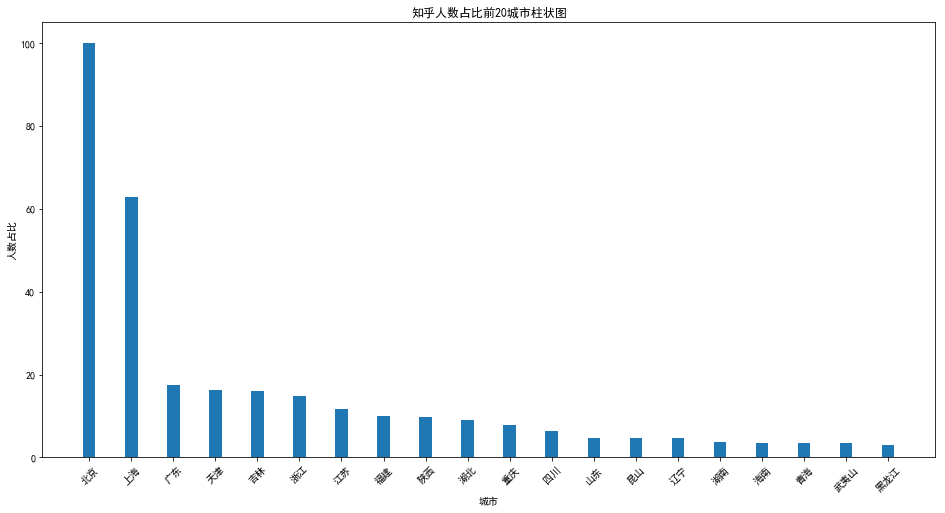

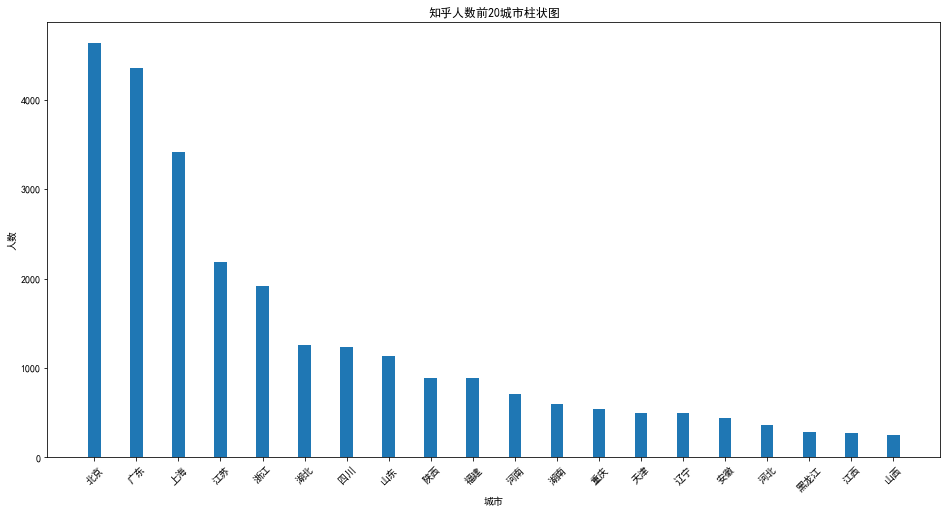

In [116]:
'''
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin) 极差变换法
② 可自行设置图表风格
'''
# target_document 是我们的目标数据
# 最小值 最大值
min = target_document['密度'].min()
max = target_document['密度'].max()
print(min)
print(max)
# 均值
print(target_document['密度'].mean())
# 长度
midu_len=len(target_document['密度'])
# print(midu_len)
# 生成一个新的列 使用 map 和 匿名函数 匿名函数即极差变换法
target_document['标准化']=target_document['密度'].map(lambda x:(x-min)/(max-min)*100)
# 对target_document 以标准化为索引进行排序 降序排列
midu_top_20 = target_document.sort_values(['标准化'],ascending=False)[:20][['标准化','city']]
nums_top_20 = target_document.sort_values(['_id'],ascending=False)[:20][['_id','city']]
# print(midu_top_20)
# print(nums_top_20)

import matplotlib
fig1,ax1=plt.subplots(figsize=(16,8))
matplotlib.rcParams['font.family'] ='SimHei'
plt.xticks(rotation =45)
ax1.set_xlabel('城市')
ax1.set_ylabel('人数占比')
ax1.set_title('知乎人数占比前20城市柱状图')
plt.bar(midu_top_20['city'],midu_top_20['标准化'],0.3)

fig2,ax2=plt.subplots(figsize=(16,8))
matplotlib.rcParams['font.family'] ='SimHei'
plt.xticks(rotation =45)
ax2.set_xlabel('城市')
ax2.set_ylabel('人数')
ax2.set_title('知乎人数前20城市柱状图')
plt.bar(nums_top_20['city'],nums_top_20['_id'],0.3)

In [117]:
'''
3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格
'''

                 关注     关注者
教育经历                       
武汉大学          51119   53055
华中科技大学        45328   48177
浙江大学          45057  604144
北京大学          43343  197571
东南大学          29361   41814
上海交通大学        28678   45968
吉林大学          28348  159261
复旦大学          28045   37905
中山大学（SYSU）    27085   15018
深圳大学          27064    2566
哈尔滨工业大学（HIT）  26490  103087
四川大学          24640  100392
同济大学          24519   29510
厦门大学          23840   93728
湖南大学          22971   33453
南京大学          20972    8846
清华大学          20546   25875
上海财经大学        19603  138058
大学本科          19473    6194
西安电子科技大学      19184    2598


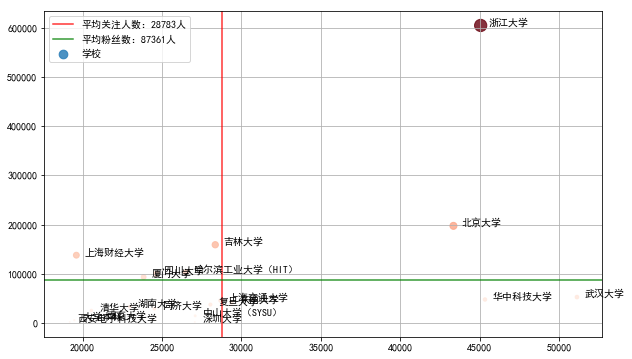

In [131]:
# 统计计算学校的粉丝数、被关注量
q2data = data_zhihu_clearned.groupby('教育经历').sum()[['关注','关注者']].drop([0,'大学','本科'])
q2data_c = q2data.sort_values('关注',ascending=False)[:20]
print(q2data_c)

plt.figure(figsize=(10,6))
x = q2data_c['关注']
y = q2data_c['关注者']
follow_mean = q2data_c['关注'].mean()
fans_mean = q2data_c['关注者'].mean()

plt.scatter(x,y,marker='.',
           s = y/1000,
           cmap = 'Reds',
           c = y,
           alpha = 0.8,
           label = '学校')
# 创建散点图
plt.axvline(follow_mean,label="平均关注人数：%i人" % follow_mean,color='r',alpha=0.8)  # 添加x轴参考线
plt.axhline(fans_mean,label="平均粉丝数：%i人" % fans_mean,color='g',alpha=0.8)   # 添加y轴参考线
plt.legend(loc = 'upper left')
# 添加方格
plt.grid()

# 添加注释
for i,j,n in zip(x,y,q2data_c.index):
    plt.text(i+500,j,n, color = 'k')


<BarContainer object of 19 artists>

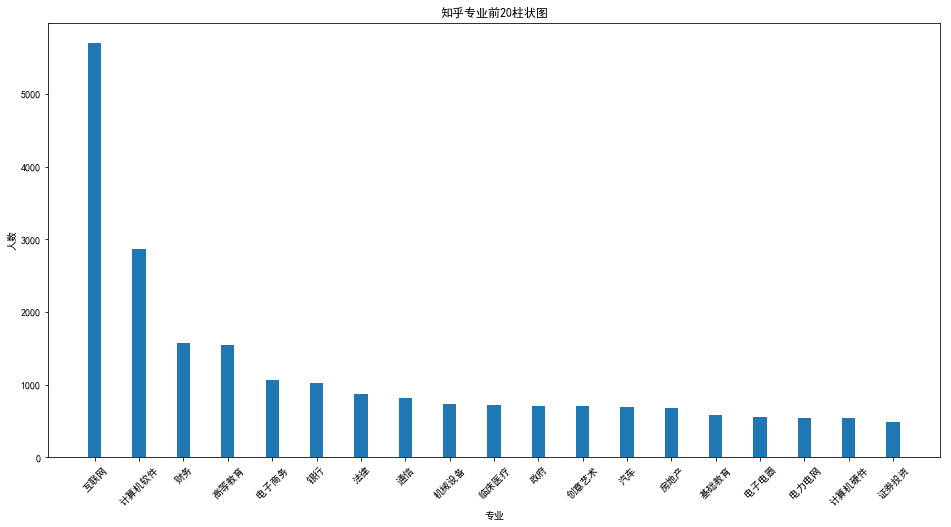

In [154]:
# 职业分类 前20可视化
zhiye2= data_zhihu_clearned.groupby('职业2').count()
zhiye2_cleared_20 =zhiye2.sort_values(['_id'],ascending=False)[:20][['_id']][1:]
zhiye2_cleared_20['专业']=zhiye2_cleared_20.index
# zhiye2_cleared_20

fig2,ax2=plt.subplots(figsize=(16,8))
matplotlib.rcParams['font.family'] ='SimHei'
plt.xticks(rotation =45)
ax2.set_xlabel('专业')
ax2.set_ylabel('人数')
ax2.set_title('知乎专业前20柱状图')
plt.bar(zhiye2_cleared_20['专业'],zhiye2_cleared_20['_id'],0.3)